In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('winequality(limpio).csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,density-kg/m^3,quality classification,Red,White
0,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.80,Mala,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.140553,3.20,0.68,9.8,5,996.80,Mala,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.110599,3.26,0.65,9.8,5,997.00,Mala,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.124424,3.16,0.58,9.8,6,998.00,Media,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,0.064516,3.51,0.56,9.4,5,997.80,Mala,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,0.198157,3.27,0.50,11.2,6,991.14,Media,0,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,0.373272,3.15,0.46,9.6,5,994.90,Mala,0,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,0.241935,2.99,0.46,9.4,6,992.54,Media,0,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,0.239631,3.34,0.38,12.8,7,988.69,Media,0,1


C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Densidad'), Text(0.5, 0, 'Alcohol')]

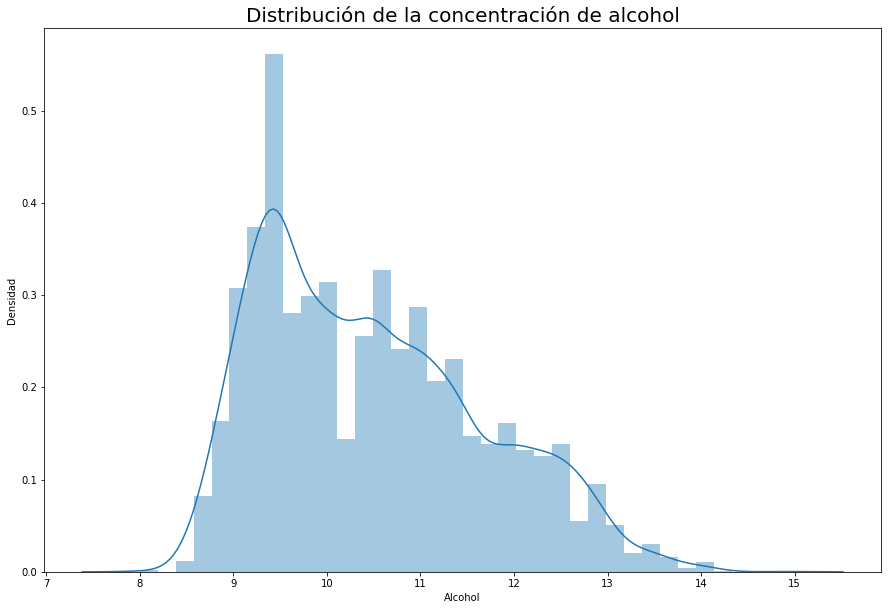

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
ax = sns.distplot(df['alcohol'])
ax.set_title('Distribución de la concentración de alcohol', size=20)
ax.set(ylabel='Densidad', xlabel='Alcohol')

In [6]:
df['quality classification'].value_counts()

Media    3915
Mala     2384
Alta      198
Name: quality classification, dtype: int64

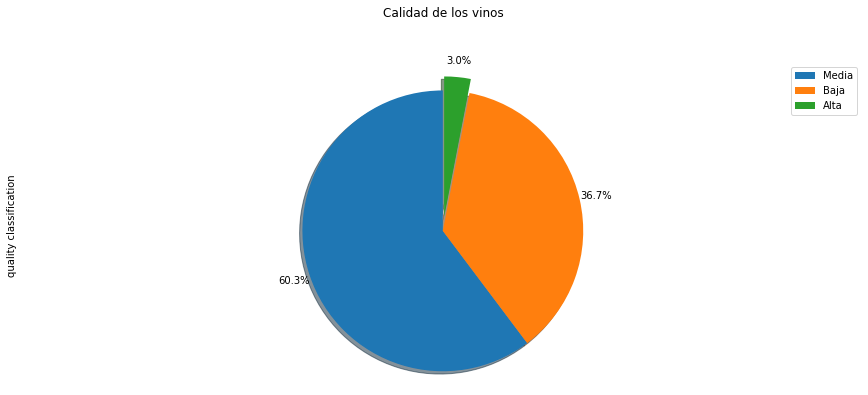

In [7]:

lista_explotar = [0, 0, 0.1] # relación para cada continente del inclinado de cada porción.
df['quality classification'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,           # desactiva las etiquetas en el gráfico
                            pctdistance=1.12,      # relación entre el centro de cada sector circular y el inicio del texto generado por autopct 
                              # añadir colores personalizados
                            explode=lista_explotar # explotar los 3 continentes más bajos
                            )

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Calidad de los vinos', y=1.12) 

plt.axis('equal')

# añadir leyenda
plt.legend(('Media', 'Baja', 'Alta'))


plt.show()

C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\56981\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


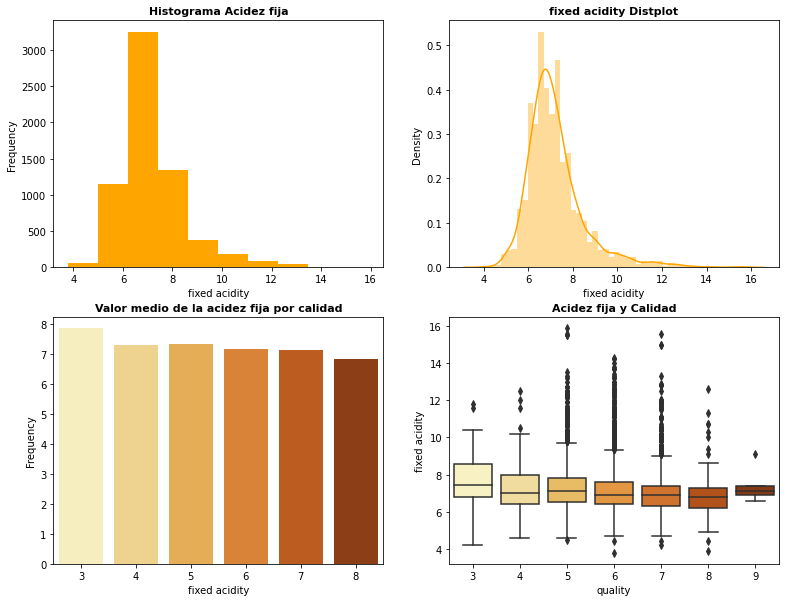

In [8]:
quality = [3,4,5,6,7,8]
fixedAcidityMean = []

for each in quality:
    x = df[df["quality"] == each]
    mean = x["fixed acidity"].mean()
    fixedAcidityMean.append(mean)


plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.hist(df["fixed acidity"], color="orange")
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.title("Histograma Acidez fija", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,2)
sns.distplot(df["fixed acidity"],  color="orange")
plt.title("fixed acidity Distplot", color = "black", fontweight='bold', fontsize = 11)
plt.subplot(2,2,3)
sns.barplot(x = quality, y = fixedAcidityMean, palette="YlOrBr")
plt.title("Valor medio de la acidez fija por calidad", color = "black", fontweight='bold', fontsize = 11)
plt.xlabel("fixed acidity")
plt.ylabel("Frequency")
plt.subplot(2,2,4)
sns.boxplot(df['quality'], df["fixed acidity"], palette='YlOrBr')
plt.title("Acidez fija y Calidad", color = "black", fontweight= 'bold', fontsize = 11)

plt.show()

In [9]:
df_pH = df['pH']
df_pH.head()

0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64

<class 'matplotlib.axes._subplots.AxesSubplot'>


Text(0.5, 0, 'Muestras')

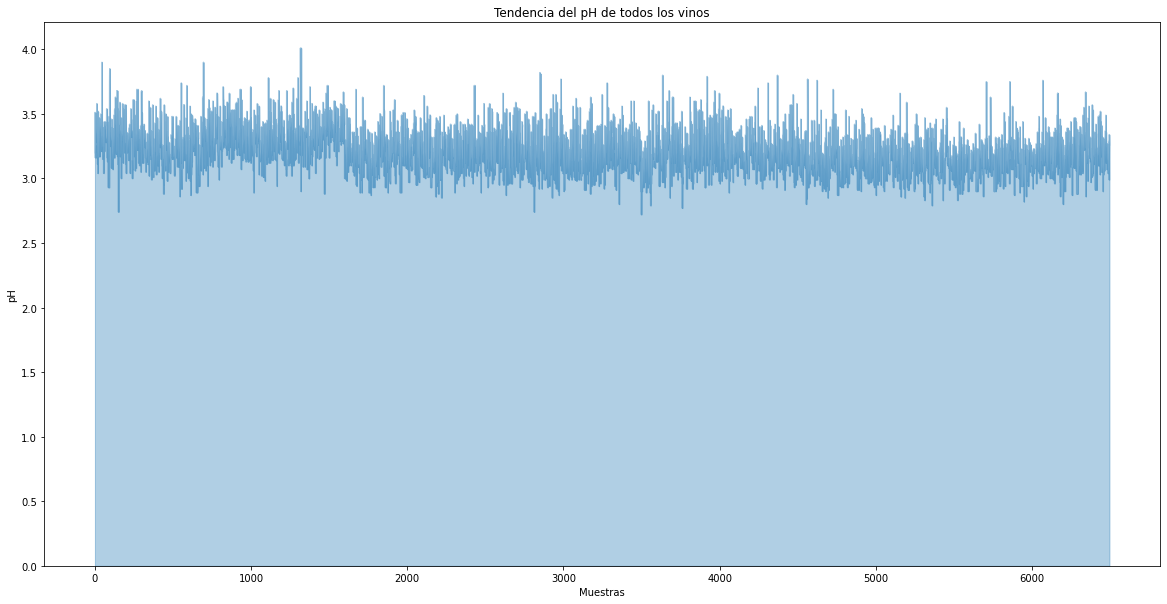

In [10]:
ax = df_pH.plot(kind='area', alpha=0.35, figsize=(20, 10))
print(type(ax))

ax.set_title('Tendencia del pH de todos los vinos')
ax.set_ylabel('pH')
ax.set_xlabel('Muestras')